# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import timeit 
import requests as req
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec
from scipy.stats import chisquare
from io import BytesIO
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import norm
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

ALPHA = 0.05
import warnings
warnings.simplefilter("ignore")

In [2]:
variables ={
    'Churn': 'факт оттока в текущем месяце',
    'gender':'пол',
    'Near_Location': 'проживание или работа в районе, где находится фитнес-центр',
    'Partner' :'сотрудник компании-партнёра клуба',
    'Promo_friends' :'факт первоначальной записи в рамках акции «приведи друга»',
    'Phone' :'наличие контактного телефона',
    'Age' :'возраст',
    'Lifetime' :'время с момента первого обращения в фитнес-центр (в месяцах)',
    'Contract_period' :'длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)',
    'Month_to_end_contract' :'срок до окончания текущего действующего абонемента (в месяцах)',
    'Group_visits' :'факт посещения групповых занятий',
    'Avg_class_frequency_total' :'средняя частота посещений в неделю за все время с начала действия абонемента',
    'Avg_class_frequency_current_month' :'средняя частота посещений в неделю за предыдущий месяц',
    'Avg_additional_charges_total' :'суммарная выручка от других услуг фитнес-центра',
}



# Оглавление <a id='section_XXII'></a>
[I. Загрузка данных](#section_I)

[II. EDA](#section_II)

[Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());](#section_III)

[Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())](#section_IV)

[Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#section_V)

[Постройте матрицу корреляций и отобразите её](#section_VI)

[III. Модель прогнозирования оттока клиентов](#section_VII)

[Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце](#section_VIII)

[Разбейте данные на обучающую и валидационную выборку функцией train_test_split(). Не забудьте указать параметр random_state при разделении выборки и задании алгоритма](#section_IX)

[Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом](#section_X)

[Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке](#section_XI)

[Сравните по ним модели. Какая модель показала себя лучше на основании метрик?](#section_XII)

[VI. Кластеризация](#section_XIII)

[Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов)](#section_XIV)

[Постройте матрицу расстояний функцией linkage() на стандартизованной матрице ризнаков и нарисуйте дендрограмму](#section_XV)

[Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов](#section_XVI)

[Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#section_XVII)

[Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?](#section_XVIII)

[Для каждого полученного кластера посчитайте долю оттока (методом groupby())](#section_XIX)

[Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#section_XX)

[V. Выводы и рекомендации](#section_XXI)

# I. Загрузка данных <a id='section_I'></a>

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные полностью заполнены, имеют подходящие для анализа форматы. Часть данных имеет значения от 0 до 1, говорящие о наличие или отсутствии соответсвующего признака. 

# II. EDA <a id='section_II'></a>

## Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe()); <a id='section_III'></a>


In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
<a id='section_IV'></a>

In [7]:
df_groupby_сhurn = df.groupby(by='Churn').mean()
df_groupby_сhurn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Отдельные значения выборок по факту оттока в этом месяце значительно различаются. Показатели **"Partner", "Promo_friends", "Contract_period", "Group_visits", "Avg_additional_charges_total", "Month_to_end_contract", "Avg_class_frequency_total",  "Avg_class_frequency_current_month"** отличаются, причём для ушедшей группы они имеют более низкие значения.

## Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток); <a id='section_V'></a>
    

Распределения для ушедших

In [8]:
churn_rate_no = df.query('Churn == 0')

In [9]:
churn_rate_no.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


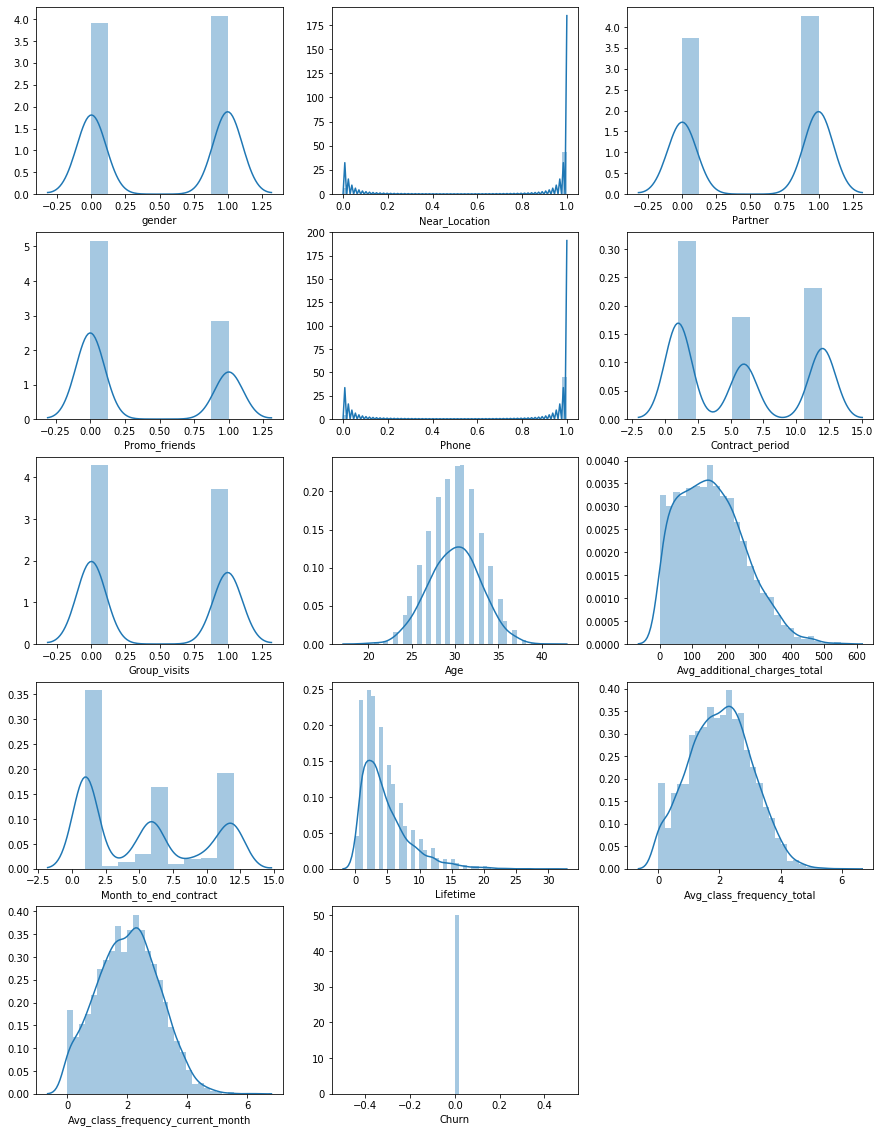

In [10]:
plt.figure(figsize=(15, 20))
for i in range(len(churn_rate_no.columns)):
    j = i + 1 
    col = churn_rate_no.columns[i]
    plt.subplot(5, 3, j)
    sns_plot = sns.distplot(churn_rate_no[col])
    sns_plot.get_figure()

Распределение для оставшихся

In [11]:
churn_rate_yes = df.query('Churn == 1')

In [12]:
churn_rate_yes.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


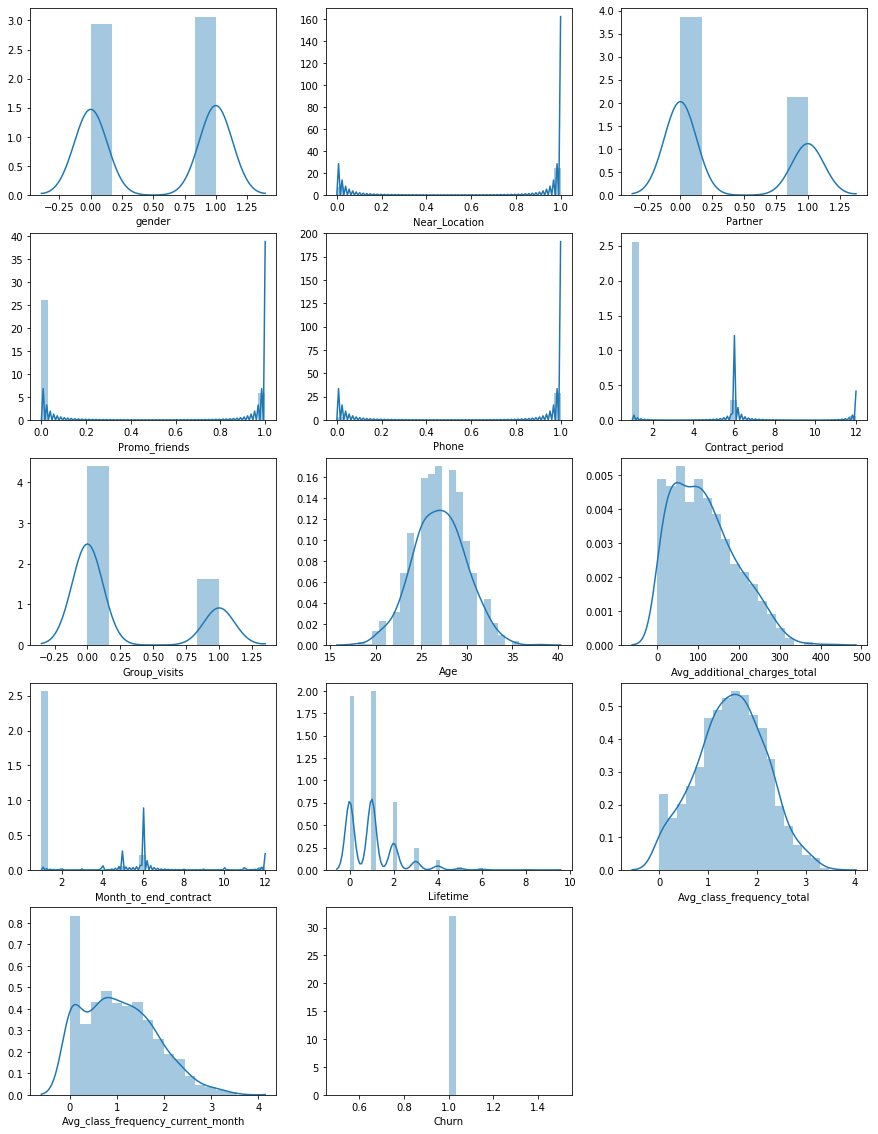

In [13]:
plt.figure(figsize=(15, 20))
for i in range(len(churn_rate_yes.columns)):
    j = i + 1 
    col = churn_rate_yes.columns[i]
    plt.subplot(5, 3, j)
    sns_plot = sns.distplot(churn_rate_yes[col])
    sns_plot.get_figure()

## Постройте матрицу корреляций и отобразите её. <a id='section_VI'></a>

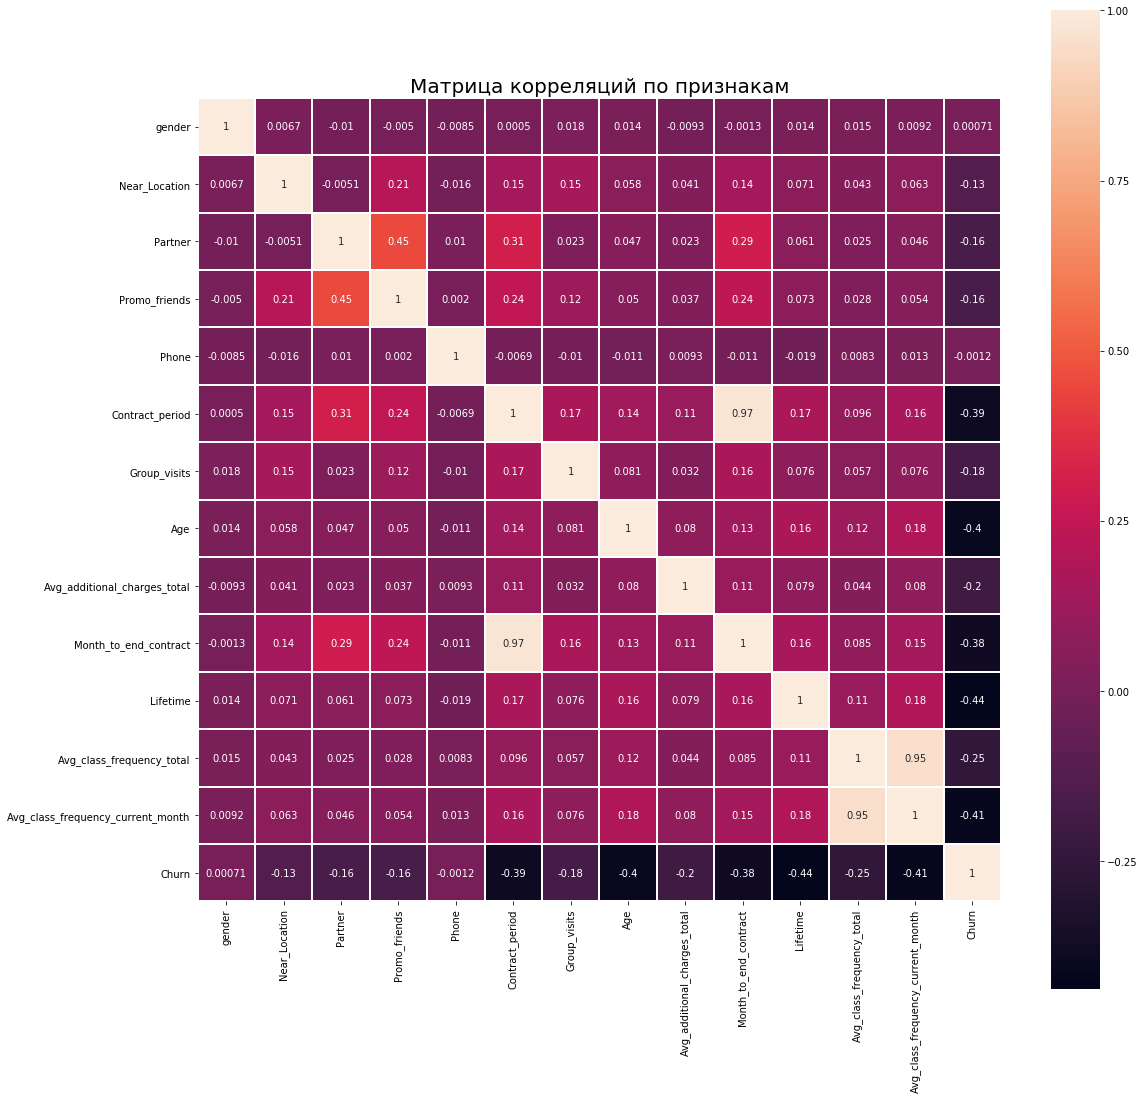

In [14]:
corr_df = df.corr()
plt.figure(figsize=(18, 18))
plt.title('Матрица корреляций по признакам', fontsize = 20)
sns.heatmap(corr_df, 
            annot = True, 
            square=True, 
            linewidths=1, 
            linecolor='white',
            fmt = '.2g')
plt.show()

Большинство признаков кореллируют между собой незначительно и не превышает значения корреляции 0,45 по модулю. Несколько признаков кореллируют между собой значительно (r = 0.97 и r = 0.95) **"Month_to_end_contract" и "Contract_period", "Avg_class_frequency_current_month" и "Avg_class_frequency_current_month"**, т.к. они зависимы между собой. Для дальнейшего анализа удалим **"Month_to_end_contract" и "Avg_class_frequency_current_month"**, для уменьшения влияния на работу алгоритмов прогнозирования.

In [15]:
variables

{'Churn': 'факт оттока в текущем месяце',
 'gender': 'пол',
 'Near_Location': 'проживание или работа в районе, где находится фитнес-центр',
 'Partner': 'сотрудник компании-партнёра клуба',
 'Promo_friends': 'факт первоначальной записи в рамках акции «приведи друга»',
 'Phone': 'наличие контактного телефона',
 'Age': 'возраст',
 'Lifetime': 'время с момента первого обращения в фитнес-центр (в месяцах)',
 'Contract_period': 'длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)',
 'Month_to_end_contract': 'срок до окончания текущего действующего абонемента (в месяцах)',
 'Group_visits': 'факт посещения групповых занятий',
 'Avg_class_frequency_total': 'средняя частота посещений в неделю за все время с начала действия абонемента',
 'Avg_class_frequency_current_month': 'средняя частота посещений в неделю за предыдущий месяц',
 'Avg_additional_charges_total': 'суммарная выручка от других услуг фитнес-центра'}

In [16]:
df = df.drop(['Month_to_end_contract','Avg_class_frequency_current_month'], axis=1)

# III. Модель прогнозирования оттока клиентов <a id='section_VII'></a>

## Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце: <a id='section_VIII'></a>


### Разбейте данные на обучающую и валидационную выборку функцией train_test_split(). Не забудьте указать параметр random_state при разделении выборки и задании алгоритма. <a id='section_IX'></a>

Разделяем данные на признаки (матрица x) и целевую переменную (y)

In [17]:
x = df.drop('Churn', axis=1)
y = df.Churn

Разделяем модель на обучающую и валидационную выборку

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Стандартизируем данные

In [19]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)


### Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом. <a id='section_X'></a>

In [21]:
df_cluster = df.copy()

#### Логистическая регрессия

In [22]:
model_log_regress =  LogisticRegression() 

In [23]:
model_log_regress.fit(x_train_st, y_train);

Сделаем прогноз

In [24]:
y_pred_log_regress = model_log_regress.predict(x_test_st)

#### Случайный лес

In [25]:
model_ran_for = RandomForestClassifier(n_estimators = 100,random_state = 0) 

In [26]:
model_ran_for.fit(x_train_st, y_train);

Сделаем прогноз

In [27]:
y_pred_ran_for = model_ran_for.predict(x_test_st)

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке.<a id='section_XI'></a>

Напишем функцию для выводы метрик моделей

In [28]:
def print_all_metrics(y_true, y_pred,  title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))



In [29]:
print_all_metrics(y_test, 
                  y_pred_log_regress, 
                  title = 'Метрики классификации "Логистическая регрессия"')

Метрики классификации "Логистическая регрессия"
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81


In [30]:
print_all_metrics(y_test, 
                  y_pred_ran_for, 
                  title = 'Метрики классификации "Случайный лес"')

Метрики классификации "Случайный лес"
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76


###  Сравните по ним модели. Какая модель показала себя лучше на основании метрик?<a id='section_XII'></a>

In [31]:
df.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Разделение классов в первоначальном датасете не равномерное и не соответсвует условиям применения метода оценки *"Доля правильных ответов" ("accuracy")*. 

Метод *precision* помогает оценить долю ложных срабатываний, т.е. отнесения клиена к группе оттока. Эта метрика позволят проверить уверенность в том, что модель точно определяет клиентов к переходящих к группе оттока. Плата за повышение такой метрики является пропуск тех клиентов, которые перейдут в групупу оттока.

Метод *recall* помогает оценить возможность модели отнести клиента к группе оттока и не пропустить не кого, плата за это может быть увеличение ложных срабатываний.

В нашем случае удержание клиента заставит использовать дополнительные ресурсы и увеличит затраты. Поэтому метрика *precision* является ключевой, она позволит не увеличивать сверх необходимого затраты на удержание клиентов, следовательно, поможет сэкономить средства.

В нашем случае у модели **Логической регрессии** значения всех метрик, в том числе ключевой выше. Поэтому при анализе имеет смысл опирать на модель **Логической регрессии**.

# VI. Кластеризация<a id='section_XIII'></a>

## Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):<a id='section_XIV'></a>

    
    

Отделим стобец с данными об оттоке

In [32]:
Churn = df.Churn

In [33]:
df_non_churn = df.drop('Churn',axis=1)

Стандартизируем данные

In [34]:
sc = StandardScaler()
x_sc = sc.fit_transform(df_non_churn)


## Постройте матрицу расстояний функцией linkage() на стандартизованной матрице ризнаков и нарисуйте дендрограмму. <a id='section_XV'></a>
На основании полученного графика предположите, какое количество кластеров можно выделить.


In [35]:
linked = linkage(x_sc, method = 'ward') 

Построим дендрограмму и оценим количество возможных классов

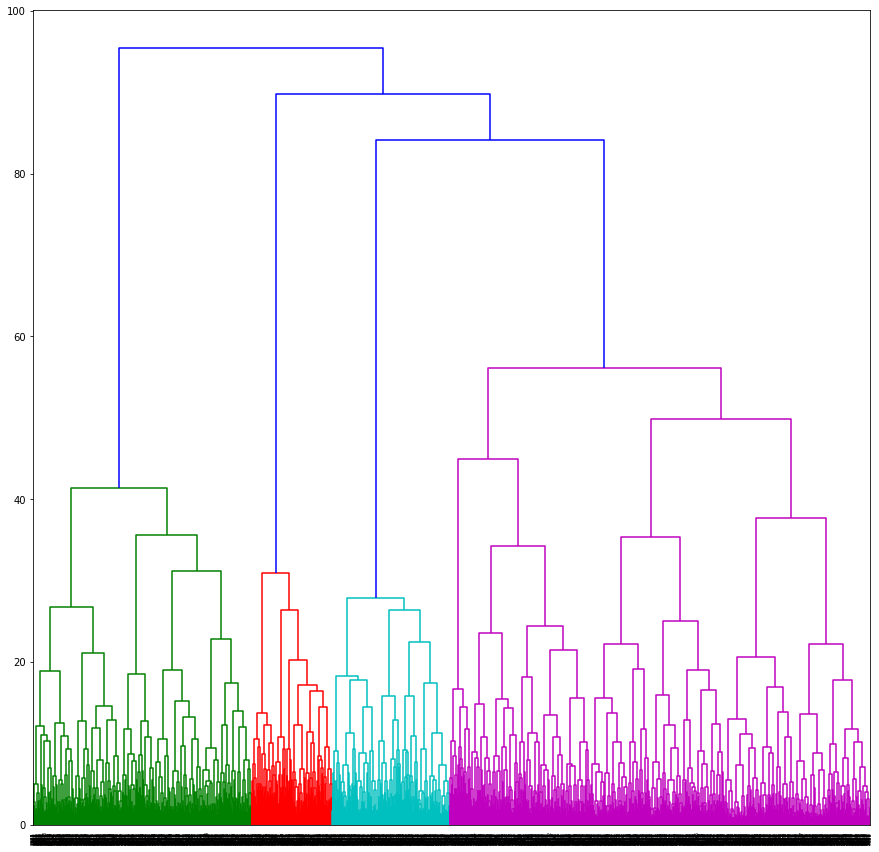

In [36]:
plt.figure(figsize=(15, 15))  
dendrogram(linked, orientation='top')
plt.show() 


На дендрограмме видно, что выборка разделяется на пять четко отделимых кластеров(4 кластер хорошо делится на два). Оценим различия по предполагаемым классам.

## Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. <a id='section_XVI'></a>

In [37]:
clusters = 5

In [38]:
km = KMeans(n_clusters = clusters)

Выделим подписи по классам

In [39]:
labels = km.fit_predict(x_sc)

## Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?<a id='section_XVII'></a>
    
   

Присоединим значение классов к первоначальным данным

In [40]:
df['clusters'] = labels

Сгруппируем данные и оценим различия по кластерам

In [41]:
df.groupby(by='clusters').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
clusters,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839
1,1.000000,0.995181,0.880723,0.637349,1.0,6.401205,0.471084,29.516867,148.785451,4.243373,1.910058,0.167470
2,0.000000,0.998795,0.915663,0.637349,1.0,6.204819,0.453012,29.327711,153.346424,4.021687,1.943214,0.172289
3,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
4,0.523331,1.000000,0.000000,0.010768,1.0,3.386217,0.419957,29.055276,146.576563,3.446518,1.872891,0.324480


In [42]:
len(df.columns)

13

## Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?<a id='section_XVIII'></a>
    

In [43]:
def drawing_distributions_features(data, cluster):
    data_cluster = data.query('clusters == @cluster')
    plt.figure(figsize=(15, 20))
    for i in range(len(data_cluster.columns)):
        j = i + 1 
        col = data_cluster.columns[i]
        plt.subplot(5, 3, j)
        sns_plot = sns.distplot(data_cluster[col])
        sns_plot.get_figure()

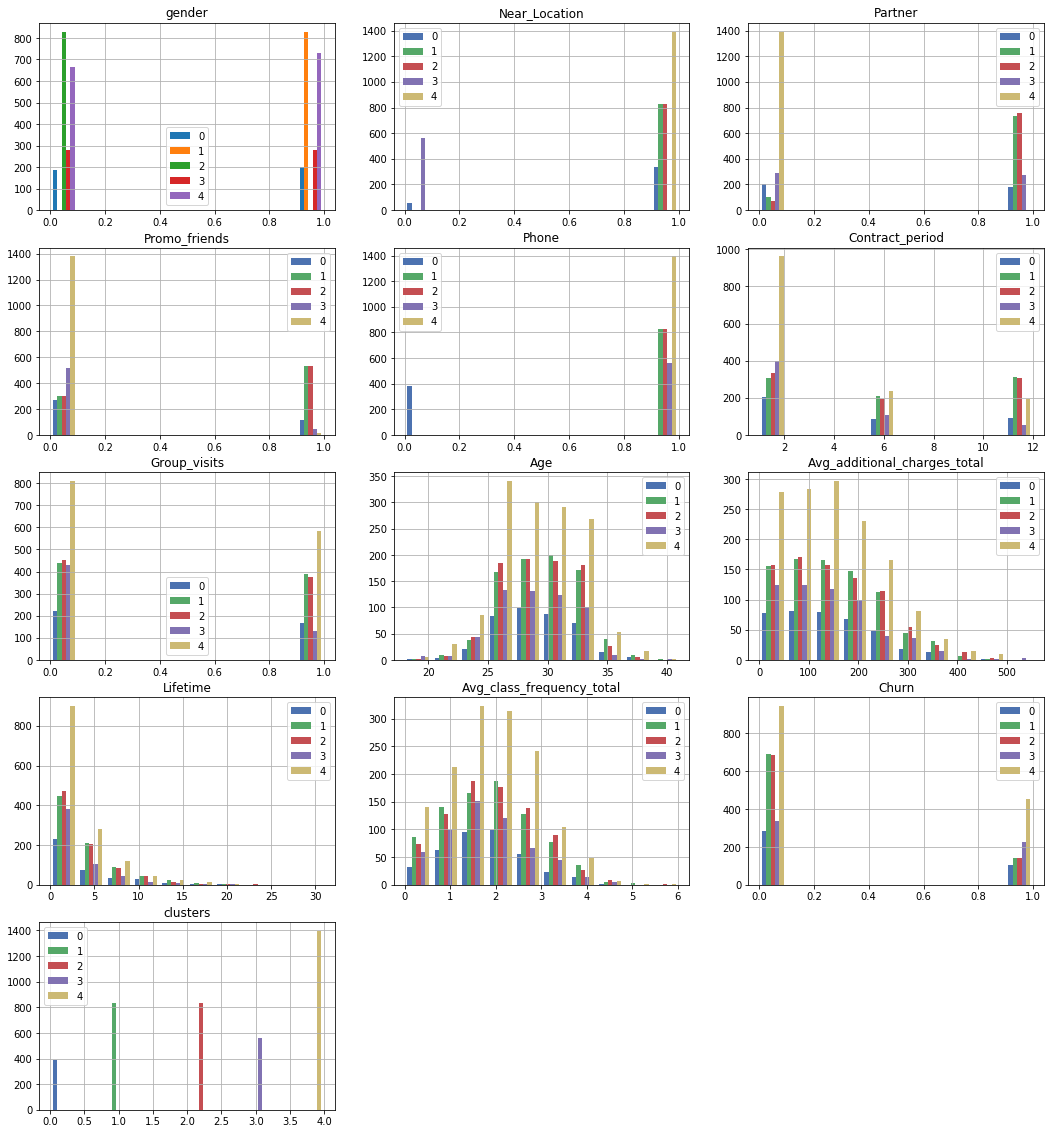

In [44]:
plt.figure(figsize=(18, 20))
for i in range(len(df.columns)):
    j = i + 1 
    col = df.columns[i]
    plt.subplot(5, 3, j)
    data_cluster_features_0 = df.query('clusters == 0')
    data_cluster_features_1 = df.query('clusters == 1')
    data_cluster_features_2 = df.query('clusters == 2')
    data_cluster_features_3 = df.query('clusters == 3')
    data_cluster_features_4 = df.query('clusters == 4')
    plt.title(col)
    plt.style.use('seaborn-deep')
    plt.hist([data_cluster_features_0[col], 
              data_cluster_features_1[col],
              data_cluster_features_2[col],
              data_cluster_features_3[col],
              data_cluster_features_4[col]], 
             label=['0','1','2','3','4'])
    plt.grid(True)
    plt.legend()
plt.show()

In [45]:
variables

{'Churn': 'факт оттока в текущем месяце',
 'gender': 'пол',
 'Near_Location': 'проживание или работа в районе, где находится фитнес-центр',
 'Partner': 'сотрудник компании-партнёра клуба',
 'Promo_friends': 'факт первоначальной записи в рамках акции «приведи друга»',
 'Phone': 'наличие контактного телефона',
 'Age': 'возраст',
 'Lifetime': 'время с момента первого обращения в фитнес-центр (в месяцах)',
 'Contract_period': 'длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)',
 'Month_to_end_contract': 'срок до окончания текущего действующего абонемента (в месяцах)',
 'Group_visits': 'факт посещения групповых занятий',
 'Avg_class_frequency_total': 'средняя частота посещений в неделю за все время с начала действия абонемента',
 'Avg_class_frequency_current_month': 'средняя частота посещений в неделю за предыдущий месяц',
 'Avg_additional_charges_total': 'суммарная выручка от других услуг фитнес-центра'}

По полученным графикам можно сравнить кластеры. Так по показателям **полового состава, средней частоты посещений, времени с первого обращения в фитнес центр, длительность текущего действующего абонемента, возраст, факт посещения групповых занятий** группы имеют сходное распределение и не отличаются между собой. 

Кластер 4 отличается от остальных тем, что имеет в своем составе большое количество людей **проживающих не в районе фитнес-центра**. 

Кластеры 0, 3 и 4 имеют сходное распределение **отношению партнерства с клубом**. Кластера 2 и 1 значительно отличаются. Среди кластера 1 большинство клиентов не являются **партнерами**, а кластер 2 имеет обратную тенденцию.

Кластер 1 имеет значительные отличия по доле клиентов приведнных в рамках **акции "приведи друга"**. В нем эта группа колиентов представлена максимально.

В показателе **"наличие контактного телефона"** значительно отличается кластер номер 2, он имеет максимальное количество клиентов без контактного номера.

По показателю **"средняя частота посещений в неделю за все время с начала действия абонемента** значительно выделяется кластер номер 3, его распредление смещено к более высоким показателям, по отношению к другим кластерам.

Наибольшая **"доля оттока"** наблюдается в кластере 0 по отношению к другим кластерам.




## Для каждого полученного кластера посчитайте долю оттока (методом groupby()). <a id='section_XIX'></a>
    

In [46]:
df.groupby(by='clusters')['Churn'].mean()

clusters
0    0.266839
1    0.167470
2    0.172289
3    0.399287
4    0.324480
Name: Churn, dtype: float64

## Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?<a id='section_XX'></a>

Доля оттока максимальна в кластерах 0,2 и 4. Минимальный отток наблюдается в кластере 3, он является самым надежным.

# V. Выводы и рекомендации <a id='section_XXI'></a>

Всех клиентов можно разделить на пять основных кластеров, отличаютщихся значениями срдних значений признаков. Так для наиболее надежного кластера храктерно более высокая частота посещений в неделю заведения и имеет большую долю клиентов пришедших во время акции. 

Ненадежные кластеры характеризуются различными особенностями, так один из кластеров имеет низкие значения по наличию личного телефона для контактов. 

Другой кластер характерезуется большой долей людей проживания или работы не в районе нахождения организации. Третий кластер характерезуется более низкими средними возрасными значениям.

На основе этой информации можно предложить следующие принципы:
* Для привлечения и удержания клиентов необходимо поддерживать их постоянную активность. Различными напоминаниями и акциями;
* У новых клиентов желательно получать контактную информацию. Это поможет реализовывать первый пункт;
* Лучше сосредоточить свои силы на клиентах относящихся к группе от 25-35, т.к. эта группа ниболее мотивирована получать услуги организации и при этом имеет возможность для приобритения услуг;
* Для уверенности в возвращении клиентов стоит приоритет размещать на клиентах территориально связанных с местом работы организации.

[К оглавлению](#section_XXII)